In [ ]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [ ]:
tweets = pd.read_csv('tweets.csv')

In [ ]:
print(tweets.shape)

(5232, 18)


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

In [ ]:
tweets.dropna(inplace=True)

In [ ]:
tweets.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
6,6332,2022-08-26 13:54:52.796806+00,CBI Unfold D Truth InSSRCase,1563163045748101120,2022-08-26 13:54:46+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False


In [ ]:
tweets.describe()

,id,tweet_id,followers_count,retweet_count,favorite_count
count,2467.000000,2.467000e+03,2467.000000,2467.000000,2467.000000
mean,8969.092420,1.563313e+18,1639.437779,43.910012,0.047021
std,1502.937758,1.483751e+14,1301.285789,63.113770,0.353723
min,6327.000000,1.563151e+18,8.000000,0.000000,0.000000
25%,7710.500000,1.563158e+18,476.000000,10.000000,0.000000
50%,9039.000000,1.563451e+18,1453.000000,27.000000,0.000000
75%,10218.500000,1.563454e+18,2116.000000,58.000000,0.000000
max,11557.000000,1.563460e+18,6251.000000,779.000000,6.000000


In [ ]:
temp = tweets.groupby('verified').count()['followers_count'].reset_index().sort_values(by='followers_count')
temp.style.background_gradient(cmap='Purples')

,verified,followers_count
0,False,2467


In [ ]:
temp = tweets.groupby('screen_name').count()['location'].reset_index().sort_values(by='location')
temp.style.background_gradient(cmap='Purples')

,screen_name,location
32,HinaSha59898443,1
86,_cafe_august_,1
133,sp84070,1
22,Boycott_Leader,1
116,mandarbooks,1
119,mohuamohua80,1
27,FanofSSR2,1
121,my_lyff,1
128,santosh510,1
127,reens97,1


In [ ]:
FreqOfWords = tweets['tweet'].str.split(expand=True).stack().value_counts()

FreqOfWords_top200 = FreqOfWords[:200]

FreqOfWords_top200.index

Index(['RT', 'InSSRCase', 'CBI', 'the', '@PMOIndia', 'to', 'Unfold',
       'Perpetrators', 'Truth', 'D',
       ...
       '@SumitaBasuRoy2:', 'family', 'got', 'innocent', 'death', 'waiting',
       'sushant's', 'lied', 'RheaC', 'day'],
      dtype='object', length=200)

In [ ]:
fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)

fig.update_layout(title_text = 'Freq of the words in the Dataset', title_x = 0.5, title_font=dict(size=20))

fig.update_traces(textinfo='label+value')
fig.show()

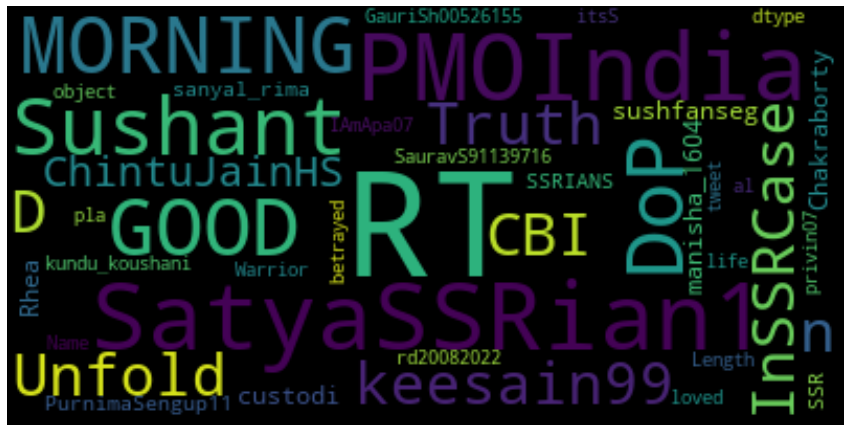

In [ ]:
wordcloud = WordCloud(max_words=150, random_state=30, collocations=True).generate(str((tweets['tweet'])))

plt.figure(figsize=(15, 8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()